In [61]:
import glob
import pandas as pd
import pyod
import os
from pyod.utils.data import generate_data, get_outliers_inliers
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.pca import PCA
import numpy as np
from sklearn.model_selection import train_test_split
import tqdm
import matplotlib.pyplot as plt
from math import *

# 一、 Benchmarks 

In [6]:
path = r'abalone\benchmarks'
path_list = glob.glob(os.path.join(path,'*.csv'))

In [11]:
len(path_list)

1725

In [90]:
res= []
classifiers = {
     'ABOD'   : ABOD,
     'KNN' :  KNN,
    'PCA':LOF,
    'HBOS':HBOS,
    'IForest':IForest
}
scores = {
     'ABOD'   : [],
     'KNN' :  [],
    'PCA':[],
    'HBOS':[],
    'IForest':[]
}

for p in tqdm.tqdm(path_list):
    df = pd.read_csv(p)
    data_x  =df.iloc[:,6:13]
    data_y = df['ground.truth'].map({'nominal':0,'anomaly':1})
    train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size = 0.2)
    contamination = np.mean(train_y)
    for key , value in classifiers.items():
        clf = value()
        clf.fit(train_x)
        #scores[key].append(pyod.utils.precision_n_scores(test_y.values,clf.predict_proba(test_x)[:,1],n=contamination))
        scores[key].append(np.mean(test_y.values == clf.predict(test_x)))

1

In [20]:
res =[]
for k,v in scores.items(): 
    res.append(scores[k])
res = np.array(res)
res = np.max(res,axis =0)
res.shape

(1725,)

不同模型在不同数据集的准确率

Text(0, 0.5, 'ACC')

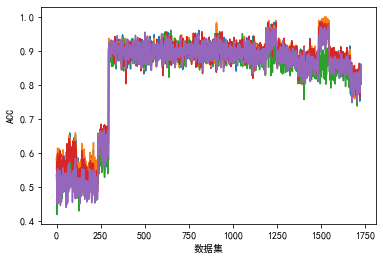

In [49]:
for k,v in scores.items(): 
    plt.plot(scores[k])
plt.xlabel('数据集')
plt.ylabel('ACC')

不同模型效果差距不大，前250个数据集效果较差，后1500数据集整体准确率偏高
考虑可能的原因是由于离群点的分布不一致

不同数据集离群点的分布如下

In [54]:
n_diff =[]
for p in tqdm.tqdm(path_list):
    df = pd.read_csv(p)
    #data_x  =df.iloc[:,6:13]
    data_y = df['ground.truth'].map({'nominal':0,'anomaly':1})
    n_diff.append(data_y.mean())

100%|██████████████████████████████████████████████████████████████████████████████| 1725/1725 [00:45<00:00, 37.88it/s]


前250与后1500数据集的离群点确实存在明显差异

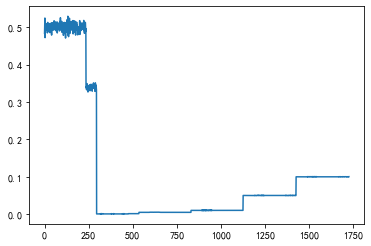

In [56]:
plt.plot(n_diff)

同一数据集最佳模型的准确率如下

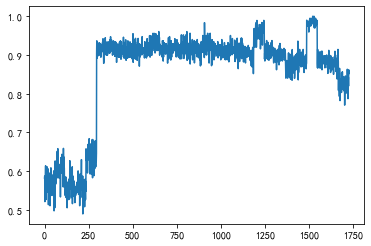

In [21]:
plt.plot(res)

In [22]:
res =[]
for k,v in scores.items(): 
    res.append(scores[k])
res = np.array(res)
res =np.argmax(res,axis=0)

In [63]:
for k,v in scores.items(): 
    print(np.mean(scores[k]))

0.8382392977552872
0.8410883694311483
0.8211602344962222
0.8395361355371275
0.8270250285372013


不同模型的作为最佳模型的频数如下

(array([394.,   0., 491.,   0.,   0., 518.,   0., 161.,   0., 161.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

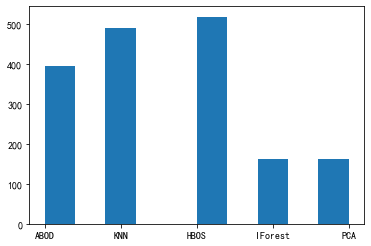

In [48]:
plt.hist(pd.Series(res).map({i:k for i ,k in enumerate(scores.keys())}),label='ls')

#  二、 Wine

In [57]:
path = r'wine\benchmarks'
path_list = glob.glob(os.path.join(path,'*.csv'))

模型训练

In [ ]:
res2= []
classifiers = {
     'ABOD'   : ABOD,
     'KNN' :  KNN,
    'PCA':LOF,
    'HBOS':HBOS,
    'IForest':IForest
}
scores2 = {
     'ABOD'   : [],
     'KNN' :  [],
    'PCA':[],
    'HBOS':[],
    'IForest':[]
}

for p in tqdm.tqdm(path_list):
    df = pd.read_csv(p)
    data_x  =df.iloc[:,6:13]
    data_y = df['ground.truth'].map({'nominal':0,'anomaly':1})
    train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size = 0.2)
    contamination = np.mean(train_y)
    for key , value in classifiers.items():
        clf = value()
        clf.fit(train_x)
        #scores2[key].append(pyod.utils.precision_n_scores(test_y.values,clf.predict_proba(test_x)[:,1],n=contamination))
        scores2[key].append(np.mean(test_y.values == clf.predict(test_x)))

获取最佳成绩

In [84]:
res =[]
for k,v in scores2.items(): 
    res.append(scores2[k])
res = np.array(res)
res = np.max(res,axis =0)
res.shape

(1725,)

不同模型的准确率

Text(0, 0.5, 'ACC')

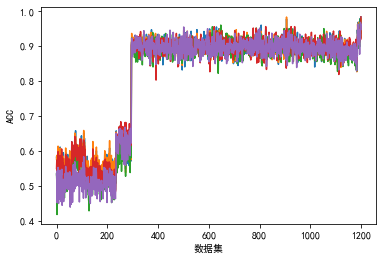

In [88]:
for k,v in scores2.items(): 
    plt.plot(scores2[k])
plt.xlabel('数据集')
plt.ylabel('ACC')

最佳准确率

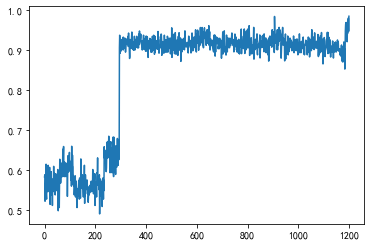

In [86]:
plt.plot(res[:1200])

In [74]:
n_diff =[]
for p in tqdm.tqdm(path_list):
    df = pd.read_csv(p)
    #data_x  =df.iloc[:,6:13]
    data_y = df['ground.truth'].map({'nominal':0,'anomaly':1})
    n_diff.append(data_y.mean())

100%|██████████████████████████████████████████████████████████████████████████████| 1210/1210 [01:08<00:00, 17.64it/s]


获取所有文件的离群点分布

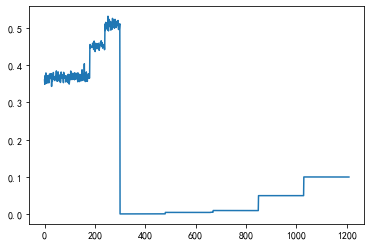

In [75]:
plt.plot(n_diff)

两个数据集的离群点分布：
    Benchmarks ：前250个文件离群点占比0.5左右，其余0.05左右，差异较大
    wine：前200个文件离群点占比0.4左右，其余在0.05左右，差异较大
    
两个数据集的最佳模型，平均效果HDOS和KNN相比较好，

不同文件的准确率如上所示，由于数据分布不一致，默认的0.1离群点占比，对 Benchmarks后1500个文件和wine的后1000个文件较为友好，准确率均在0.9左右，但对前250/200个文件由于离群点占比较高，效果则较差平均0.56左右